In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df_netflix_final = pd.read_csv("C:/Users/Usuario/Documents/Adalab49/Módulo 4/Proyecto_Módulo 4_Tableau/analisis_netflix.csv")

In [24]:
df_netflix_final.sample(10)

,type,title,director,country,release_year,age_rating,genre,rating,stars,votes,month_added,year_added,duration_min,seasons
3510,TV Show,avatar: the last airbender,Not Given,United States,2007,TV-Y7,Classic & Cult TV,8.8,Giancarlo Volpe,3865,5,2020,0,3
2592,TV Show,summertime,Not Given,Italy,2021,TV-MA,International TV Shows,6.1,Rebecca Coco Edogamhe,2806,6,2021,0,2
2816,TV Show,we are: the brooklyn saints,Not Given,United States,2021,TV-14,Docuseries,6.5,NaN,164,1,2021,0,1
3777,TV Show,the english game,Not Given,United Kingdom,2020,TV-14,British TV Shows,8.5,Tim Fywell,450,3,2020,0,1
4029,TV Show,the stranded,Not Given,Thailand,2019,TV-MA,International TV Shows,6.8,Sophon Sakdaphisit,53,11,2019,0,1
4169,TV Show,bard of blood,Not Given,India,2019,TV-MA,International TV Shows,6.8,Gurii,13114,9,2019,0,1
2575,TV Show,the gift,Not Given,Turkey,2021,TV-MA,International TV Shows,7.8,Ozan Açiktan,687,6,2021,0,3
3217,TV Show,trinkets,Not Given,United States,2020,TV-MA,TV Dramas,7.5,Sherwin Shilati,139,8,2020,0,2
953,Movie,happy old year,Nawapol Thamrongrattanarit,Thailand,2019,TV-MA,Dramas,7.2,Nawapol Thamrongrattanarit,2312,3,2020,113,0
2606,TV Show,the kominsky method,Not Given,United States,2021,TV-MA,TV Comedies,8.0,Beth McCarthy-Miller,835,5,2021,0,3


C:\Users\Usuario\AppData\Local\Temp\ipykernel_14236\2818429717.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df_netflix_final, palette='viridis')


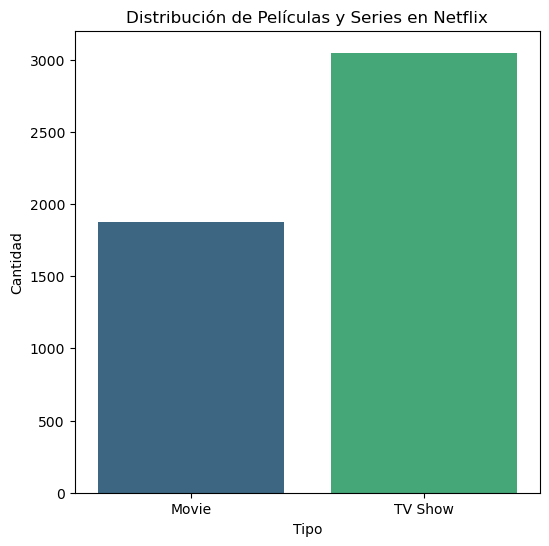

In [5]:
# Gráfico
plt.figure(figsize=(6,6))
sns.countplot(x='type', data=df_netflix_final, palette='viridis')
plt.title('Distribución de Películas y Series en Netflix')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.show()

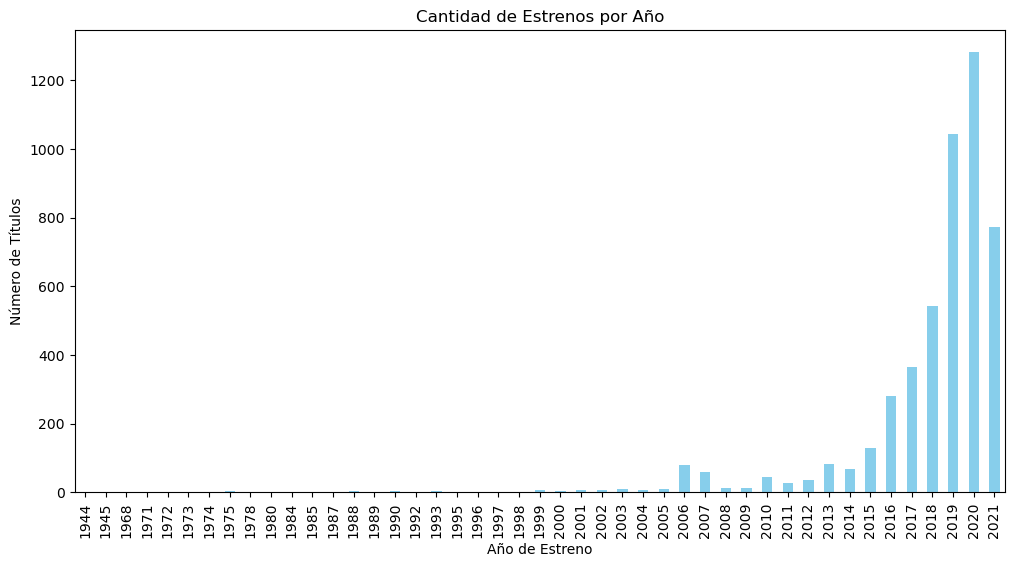

In [6]:
plt.figure(figsize=(12,6))
df_netflix_final['release_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Cantidad de Estrenos por Año')
plt.xlabel('Año de Estreno')
plt.ylabel('Número de Títulos')
plt.show()

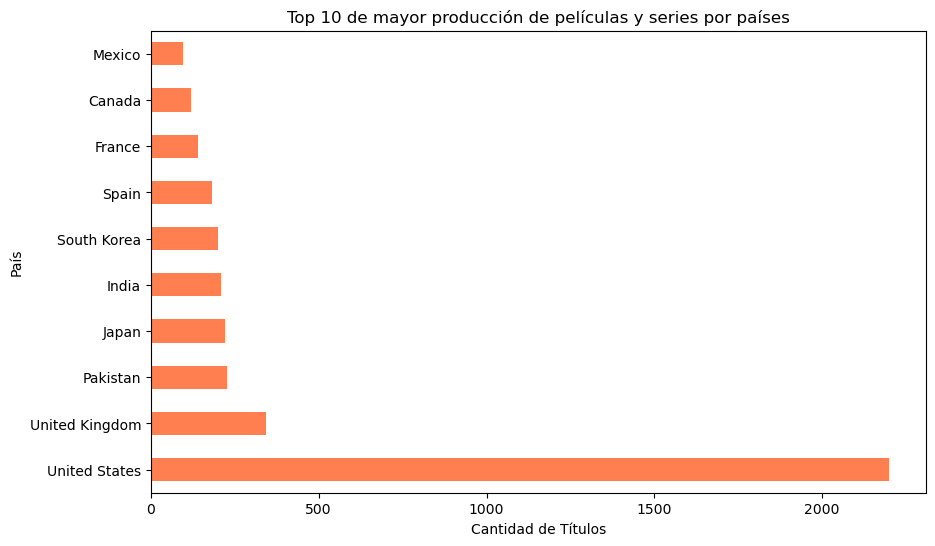

In [ ]:
plt.figure(figsize=(10,6))
df_netflix_final['country'].value_counts().head(10).plot(kind='barh', color='coral')
plt.title("Top 10 de mayor producción de películas y series por países")
plt.xlabel('Cantidad de Títulos')
plt.ylabel('País')
plt.show()

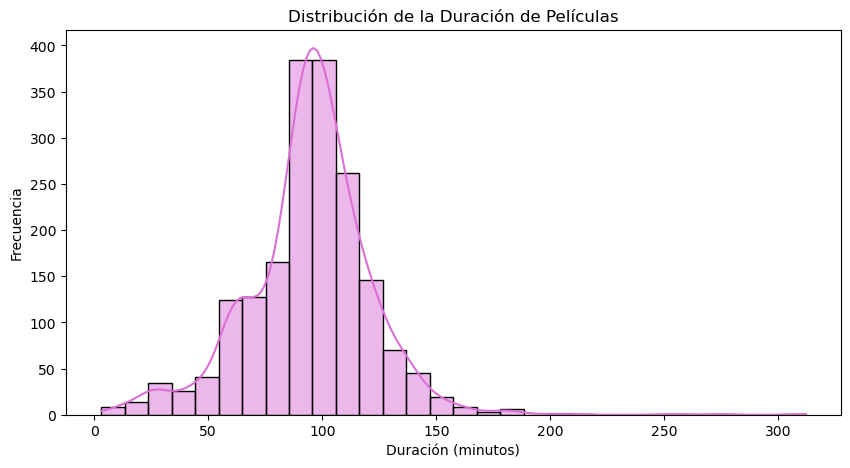

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(df_netflix_final[df_netflix_final['duration_min'] > 0]['duration_min'], bins=30, kde=True, color='orchid')
plt.title('Distribución de la Duración de Películas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.show()

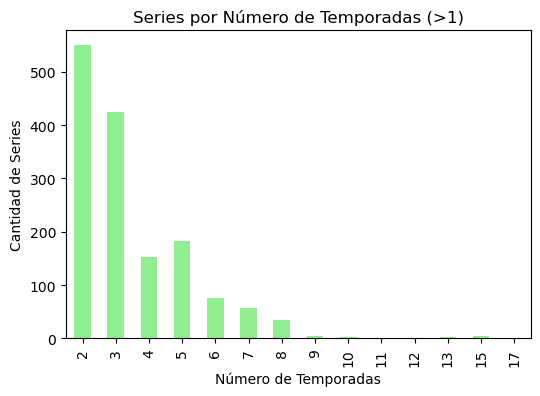

In [10]:
plt.figure(figsize=(6,4))
df_netflix_final[df_netflix_final['seasons'] > 1]['seasons'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Series por Número de Temporadas (>1)')
plt.xlabel('Número de Temporadas')
plt.ylabel('Cantidad de Series')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14236\1780478272.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df_netflix_final, order=df_netflix_final['rating'].value_counts().index, palette='coolwarm')


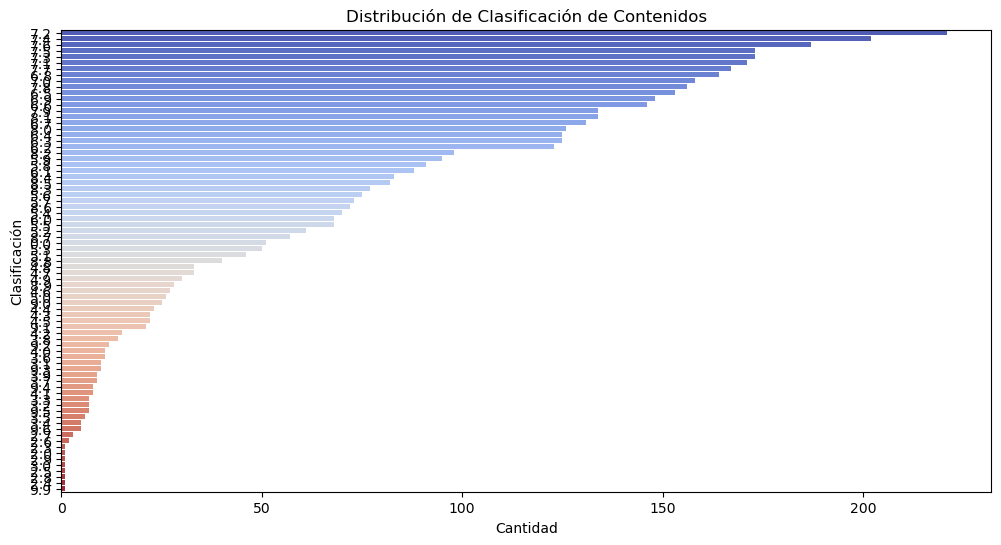

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(y='rating', data=df_netflix_final, order=df_netflix_final['rating'].value_counts().index, palette='coolwarm')
plt.title('Distribución de Clasificación de Contenidos')
plt.xlabel('Cantidad')
plt.ylabel('Clasificación')
plt.show()

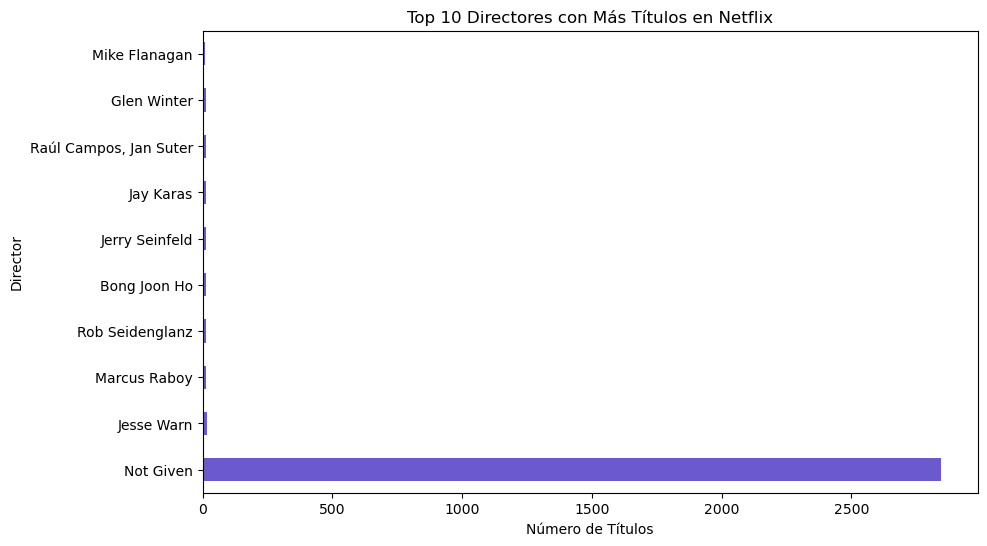

In [22]:
plt.figure(figsize=(10,6))
df_netflix_final['director'].value_counts().head(10).plot(kind='barh', color='slateblue')
plt.title('Top 10 Directores con Más Títulos en Netflix')
plt.xlabel('Número de Títulos')
plt.ylabel('Director')
plt.show()

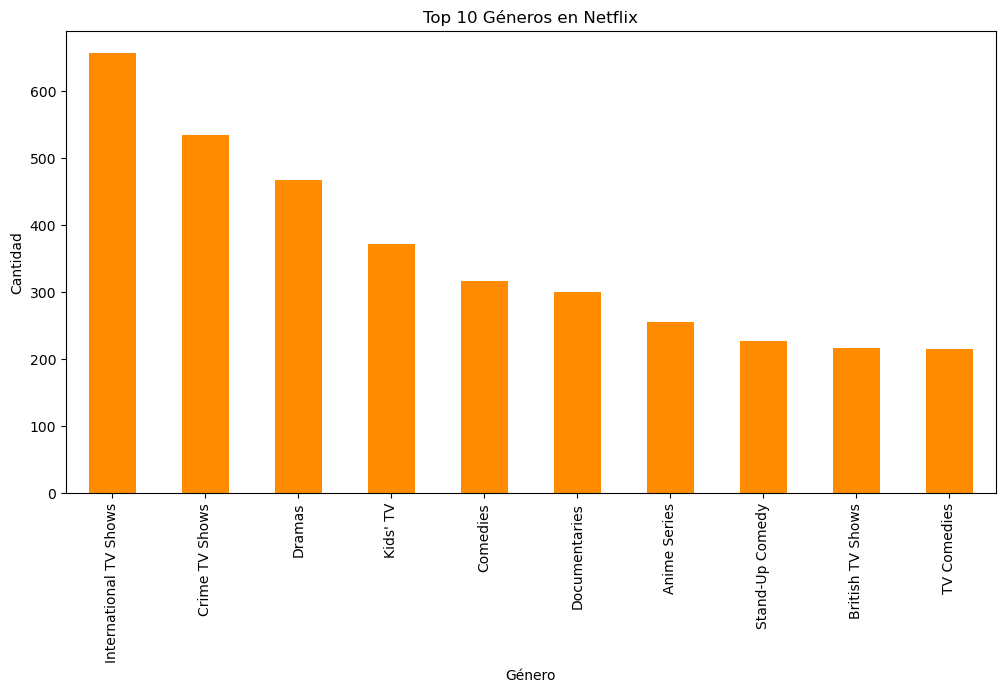

In [14]:
plt.figure(figsize=(12,6))
df_netflix_final['genre'].str.split(',').explode().str.strip().value_counts().head(10).plot(kind='bar', color='darkorange')
plt.title('Top 10 Géneros en Netflix')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

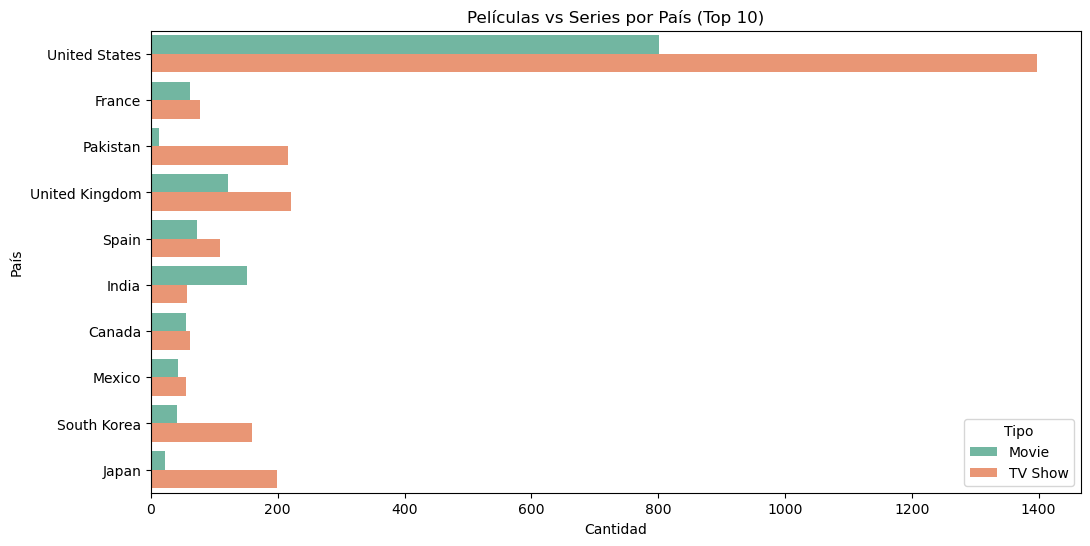

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(y='country', hue='type', data=df_netflix_final[df_netflix_final['country'].notnull() & df_netflix_final['country'].isin(df_netflix_final['country'].value_counts().head(10).index)], palette='Set2')
plt.title('Películas vs Series por País (Top 10)')
plt.xlabel('Cantidad')
plt.ylabel('País')
plt.legend(title='Tipo')
plt.show()